# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Machine Learning for Regression<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder in doing Machine Learning in Python employing models such as Ridge Regression, LASSO Regression, Elastic Net, and Random Forest Regressor. 

# <font face = 'Palatino Linotype' color = '#5885AF'> Business Understanding:<font/>
Management seeks to gain a deeper understanding of the factors that drive employee productivity across the organization. The Human Resources and Development department has provided a comprehensive employee dataset containing demographic, performance, and engagement-related variables. The primary business objective is to DEVELOP A PREDICTIVE MODEL that accurately estimates an employee’s ProductivityScore based on key predictors such as age, department, tenure, education level, remote work ratio, job satisfaction, work hours, project load, managerial feedback, training participation, promotion history, and recent performance ratings.

By identifying and quantifying the most influential drivers of productivity, the organization aims to:
- Improve workforce management and development strategies,
- Optimize training and performance review programs,
- Support data-driven decision-making in promotions, hiring, and resource allocation, and
- Enhance overall organizational efficiency and employee satisfaction.

The success of this initiative will be measured by the model’s ability to accurately predict productivity and provide actionable insights that inform HR and management policies.

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # used for training and testing a model
import math # used to separate the whole number from the decimal values

In [2]:
# Load the data set
df = pd.read_csv("employee_productivity_data.csv")
df.head()

,EmployeeID,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,ProductivityScore
0,E1000,38,Sales,2,Doctorate,0.185514,5.920116,40.276694,1,6.502751,8,0,4.137347,12.476211
1,E1001,34,HR,5,Masters,0.216995,8.072396,42.061825,2,7.120543,0,1,4.074450,11.518505
2,E1002,39,Engineering,7,Doctorate,0.115267,7.648904,42.515609,7,7.060784,16,1,3.931233,0.097737
3,E1003,45,Marketing,0,Masters,0.323127,6.165400,33.347469,3,8.141761,2,0,3.242390,4.346624
4,E1004,33,Engineering,2,Double Masters,0.087053,5.761551,45.768470,3,6.819035,1,1,3.637647,5.671495


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   Department               1000 non-null   object 
 3   YearsAtCompany           1000 non-null   int64  
 4   EducationLevel           1000 non-null   object 
 5   RemoteWorkRatio          1000 non-null   float64
 6   JobSatisfactionScore     1000 non-null   float64
 7   AverageWeeklyHours       1000 non-null   float64
 8   NumProjects              1000 non-null   int64  
 9   ManagerFeedbackScore     1000 non-null   float64
 10  TrainingHoursLastYear    1000 non-null   int64  
 11  PromotionsLast5Years     1000 non-null   int64  
 12  RecentPerformanceRating  1000 non-null   float64
 13  ProductivityScore        1000 non-null   float64
dtypes: float64(6), int64(5), 

In [4]:
df.eq(' ').any()

EmployeeID                 False
Age                        False
Department                 False
YearsAtCompany             False
EducationLevel             False
RemoteWorkRatio            False
JobSatisfactionScore       False
AverageWeeklyHours         False
NumProjects                False
ManagerFeedbackScore       False
TrainingHoursLastYear      False
PromotionsLast5Years       False
RecentPerformanceRating    False
ProductivityScore          False
dtype: bool

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Understanding:<font/>
   
The dataset provided by the Human Resources and Development department contains detailed records for all employees within the organization. The primary purpose of this data is to support an analytical exploration of factors influencing employee productivity, represented by the response variable ProductivityScore.

The dataset includes a mix of demographic, behavioral, and performance-related variables that may influence productivity. The predictor variables are as follows:
- Age – The employee’s age in years, representing workforce demographics.
- Department – The functional area or division where the employee works (categorical).
- YearsAtCompany – The number of years the employee has been with the organization, reflecting experience and organizational familiarity.
- EducationLevel – The highest education qualification level attained (ordinal).
- RemoteWorkRatio – The proportion of work done remotely, indicating work flexibility.
- JobSatisfactionScore – A self-reported or survey-based score indicating job satisfaction.
- AverageWeeklyHours – The average number of hours worked per week.
- NumProjects – The number of projects currently or recently handled by the employee.
- ManagerFeedbackScore – The manager’s performance feedback rating.
- TrainingHoursLastYear – The total number of hours spent in training over the past year.
- PromotionsLast5Years – The number of promotions received within the last five years.
- RecentPerformanceRating – The most recent formal performance appraisal score.

The dataset is expected to include both numerical and categorical data types, potentially with varying scales and distributions. Before modeling, the data will need to be explored and preprocessed to ensure quality and reliability. This will involve checking for missing values, outliers, inconsistent data entries, and correlations among variables. Exploratory Data Analysis (EDA) will also be performed to uncover patterns, relationships, and possible drivers of productivity.

Understanding these characteristics will guide appropriate feature engineering, data transformation, and model selection steps to ensure that the resulting machine learning model accurately reflects the underlying dynamics of employee productivity within the organization.

# <font face = 'Palatino Linotype' color = '#5885AF'> Data Preparation:<font/>

In [5]:
# Drop the irrelevant feature for developing the machine learning model.
df = df.drop(['EmployeeID'], axis = 1)
df.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,ProductivityScore
0,38,Sales,2,Doctorate,0.185514,5.920116,40.276694,1,6.502751,8,0,4.137347,12.476211
1,34,HR,5,Masters,0.216995,8.072396,42.061825,2,7.120543,0,1,4.074450,11.518505
2,39,Engineering,7,Doctorate,0.115267,7.648904,42.515609,7,7.060784,16,1,3.931233,0.097737
3,45,Marketing,0,Masters,0.323127,6.165400,33.347469,3,8.141761,2,0,3.242390,4.346624
4,33,Engineering,2,Double Masters,0.087053,5.761551,45.768470,3,6.819035,1,1,3.637647,5.671495


In [6]:
# Split the dataset into train and test sets.
# Given 12 explanatory variables we would at need > 146 observations for
# training a regression model (Tabachnick and Fidell, 2013). The 70-30 split
# will be used for this project. 
train, test = train_test_split(df, test_size=0.30, random_state=42)
print(f'''The number of records for the train set is {len(train)}.
The number of records for the test set is {len(test)}.''')
# Source: Tabachnick, B.G.,Fidell, L.S., 2013. Using Multivariate Statistics, 
#         6th ed. Pearson Education, Inc., Boston. 

The number of records for the train set is 700.
The number of records for the test set is 300.


In [7]:
# Separating the explanatory variables from the outcome variable.
x_train = train.drop(['ProductivityScore'], axis = 1)
y_train = train['ProductivityScore']
x_train.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating
541,27,Finance,19,Masters,0.318567,6.338491,42.556954,6,8.296587,16,1,2.822625
440,37,Engineering,0,Doctorate,0.470034,3.622929,48.808036,2,4.030609,9,0,2.901293
482,23,IT,0,Double Doctorate,0.293242,3.244847,40.723709,4,8.124908,2,0,2.176832
422,33,Finance,8,Double Masters,0.112839,4.997061,40.719208,3,5.742014,28,0,3.471394
778,34,Sales,7,Double Masters,0.062158,6.319681,48.395419,1,6.399914,13,0,3.726580


In [8]:
# Separating the explanatory variables from the outcome variable.
x_test = test.drop(['ProductivityScore'], axis = 1)
y_test = test['ProductivityScore']
x_test.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating
521,38,Sales,0,Double Masters,0.246990,8.074922,38.760913,3,8.025122,7,0,2.586867
737,41,HR,16,Double Masters,0.555279,6.719708,44.123997,1,7.363437,46,2,5.000000
740,22,Finance,1,Double Masters,0.203573,4.621592,38.109093,2,5.926731,31,0,3.973682
660,30,HR,1,Doctorate,0.210185,6.427122,32.175514,5,6.514476,11,0,1.000000
411,27,HR,2,Masters,0.156057,6.115394,43.016769,2,9.402989,45,1,3.380332


In [9]:
# Standardize all the continuous variables.
from sklearn.preprocessing import StandardScaler

# Assigning feature labels to variable continuous_vars.
continuous_vars = ['Age','YearsAtCompany', 'RemoteWorkRatio', 'JobSatisfactionScore',
                   'AverageWeeklyHours','NumProjects', 'ManagerFeedbackScore', 'TrainingHoursLastYear',
                  'PromotionsLast5Years', 'RecentPerformanceRating']

# Initialize StandardScaler.
scaler = StandardScaler()

# Fit scaler to the continuous variables and transform them.
x_train[continuous_vars] = scaler.fit_transform(x_train[continuous_vars])

In [10]:
# Standardize all the continuous variables.
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a DataFrame called df with continuous variables
# Replace continuous_vars with the names of your continuous variables
continuous_vars = ['Age','YearsAtCompany', 'RemoteWorkRatio', 'JobSatisfactionScore',
                   'AverageWeeklyHours','NumProjects', 'ManagerFeedbackScore', 'TrainingHoursLastYear',
                  'PromotionsLast5Years', 'RecentPerformanceRating']

# Fit scaler to the continuous variables and transform them
x_test[continuous_vars] = scaler.transform(x_test[continuous_vars])

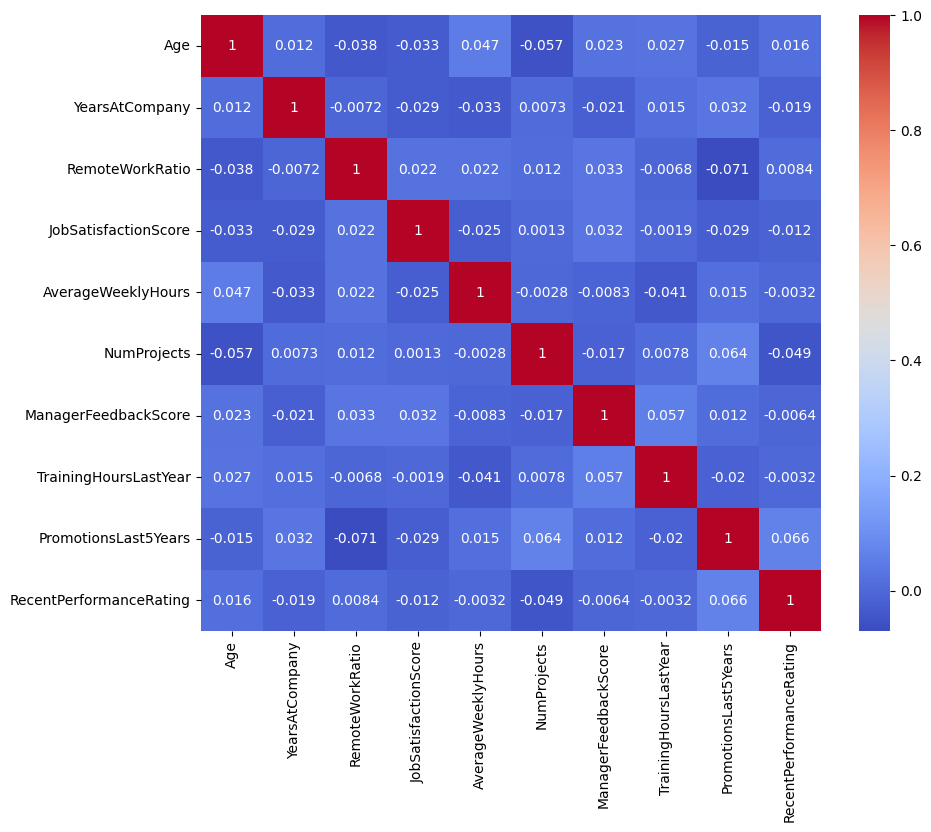

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Checking for Multicollinearity among continuous variables using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(x_train[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# One-hot encode categorical variables automatically
x_train = pd.get_dummies(x_train, drop_first=True)
x_train.head()

,Age,YearsAtCompany,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,EducationLevel_Doctorate,EducationLevel_Double Doctorate,EducationLevel_Double Masters,EducationLevel_Masters
541,-1.135311,3.096088,0.184002,0.169376,0.092165,1.680807,0.937679,-0.172207,0.549366,-0.894585,True,False,False,False,False,False,False,False,True
440,0.323958,-0.933068,1.107419,-1.188549,1.305606,-0.560269,-2.092690,-0.542463,-0.896335,-0.791980,False,False,False,False,False,True,False,False,False
482,-1.719018,-0.933068,0.029611,-1.377610,-0.263699,0.560269,0.815725,-0.912719,-0.896335,-1.736863,False,False,True,False,False,False,True,False,False
422,-0.259750,0.763419,-1.070214,-0.501410,-0.264572,0.000000,-0.876981,0.462518,-0.896335,-0.048424,True,False,False,False,False,False,False,True,False
778,-0.113823,0.551358,-1.379191,0.159970,1.225510,-1.120538,-0.409637,-0.330888,-0.896335,0.284404,False,False,False,False,True,False,False,True,False


In [13]:
# One-hot encode categorical variables automatically
x_test = pd.get_dummies(x_test, drop_first=True)
x_test.head()

,Age,YearsAtCompany,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,EducationLevel_Doctorate,EducationLevel_Double Doctorate,EducationLevel_Double Masters,EducationLevel_Masters
521,0.469884,-0.933068,-0.252366,1.037683,-0.644710,0.000000,0.744842,-0.648251,-0.896335,-1.202072,False,False,False,False,True,False,False,True,False
737,0.907665,2.459906,1.627115,0.360004,0.396355,-1.120538,0.274809,1.414605,1.995067,1.945269,False,True,False,False,False,False,False,True,False
740,-1.864945,-0.721007,-0.517055,-0.689165,-0.771240,-0.560269,-0.745766,0.621199,-0.896335,0.606689,True,False,False,False,False,False,False,True,False
660,-0.697530,-0.721007,-0.476747,0.213696,-1.923048,1.120538,-0.328257,-0.436676,-0.896335,-3.271753,False,True,False,False,False,True,False,False,False
411,-1.135311,-0.508946,-0.806735,0.057816,0.181423,-0.560269,1.723620,1.361712,0.549366,-0.167192,False,True,False,False,False,False,False,False,True


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Ridge Regression<font/>

In [14]:
# Training a machine learning model for a regression problem using the x_train dataset and the
# outcome variable y_train.
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge # You can replace Ridge with any other regression model you want to tune
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Assuming you have your features in X and target variable in y

# Define Ridge regression model
ridge = Ridge()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength (L2 penalty)
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver options
}
# Perform cross-validation grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error' ) # cv=5 for 5-fold cross-validation
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
# CV RMSE of best model
cv_rmse = -grid_search.best_score_  # negate because sklearn uses "maximize" convention
print("Mean 5-fold CV RMSE:", np.round(cv_rmse,2))

# Evaluate the best model on the train set using RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE on train set
print("Root Mean Squared Error on train set:", np.round(rmse_train,2))

Best hyperparameters: {'alpha': 10.0, 'solver': 'sparse_cg'}
Mean 5-fold CV RMSE: 5.54
Root Mean Squared Error on train set: 5.44


In [15]:
# Evaluate the best model on the test set using RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE on test set
print("Root Mean Squared Error on test set:", np.round(rmse_test,2))

Root Mean Squared Error on test set: 4.64


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: LASSO Regression<font/>

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Assuming you have your features in X and target variable in y

# Define the Lasso regression model
lasso = Lasso()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Regularization strength
}

# Perform cross-validation grid search
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error' )
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
# CV RMSE of best model
cv_rmse = -grid_search.best_score_  # negate because sklearn uses "maximize" convention
print("Mean 5-fold CV RMSE:", np.round(cv_rmse,2))

# Evaluate the best model on the train set using RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE on train set
print("Root Mean Squared Error on train set:", np.round(rmse_train,2))

Best hyperparameters: {'alpha': 0.1}
Mean 5-fold CV RMSE: 5.45
Root Mean Squared Error on train set: 5.45


In [17]:
# Evaluate the best model on the test set using RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE on test set
print("Root Mean Squared Error on test set:", np.round(rmse_test,2))

Root Mean Squared Error on test set: 4.59


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Elastic Net<font/>

In [18]:
# Performing Elastic Net Regression
# Import necessary libraries
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Split the data into training and testing sets
# (You should replace this with your own dataset)
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for Elastic Net
parametersGrid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": np.arange(0.1, 0.9, 0.1)
}

# Initialize the Elastic Net model
eNet = ElasticNet()

# Perform grid search to find the best hyperparameters
grid_search  = GridSearchCV(eNet, parametersGrid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
# CV RMSE of best model
cv_rmse = -grid_search.best_score_  # negate because sklearn uses "maximize" convention
print("Mean 5-fold CV RMSE:", np.round(cv_rmse,2))

# Evaluate the best model on the train set using RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE on train set
print("Root Mean Squared Error on train set:", np.round(rmse_train,2))

Best hyperparameters: {'alpha': 1, 'l1_ratio': np.float64(0.1)}
Mean 5-fold CV RMSE: 5.45
Root Mean Squared Error on train set: 5.48


In [19]:
# Evaluate the best model on the test set using RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE on test set
print("Root Mean Squared Error on test set:", np.round(rmse_test,2))

Root Mean Squared Error on test set: 4.58


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling: Random Forest Regressor<font/>

In [20]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define Random Forest regressor
rf_regressor = RandomForestRegressor()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error' )

# Perform GridSearchCV
grid_search.fit(x_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
# Get the best model
best_model = grid_search.best_estimator_

# CV RMSE of best model
cv_rmse = -grid_search.best_score_  # negate because sklearn uses "maximize" convention
print("Mean 5-fold CV RMSE:", np.round(cv_rmse,2))
# Evaluate the best model on the train set using RMSE
y_train_pred = best_model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE on train set
print("Root Mean Squared Error on train set:", np.round(rmse_train,2))

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean 5-fold CV RMSE: 5.6
Root Mean Squared Error on train set: 3.92


In [21]:
# Evaluate the best model on the test set using RMSE
y_test_pred = best_model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE on test set
print("Root Mean Squared Error on test set:", np.round(rmse_test,2))

Root Mean Squared Error on test set: 4.81


# <font face = 'Palatino Linotype' color = '#5885AF'> Saving the Model for Future Deployment<font/>

In [22]:
# Save a copy of the Random Forest Model.
import pickle
pickle.dump(best_model, open('ENEMPmodel.pkl', 'wb'))

# Decision

Given the results of the CV RMSE across the different models, Elastic Net Regression and Lasso Regression have promising model performance given the low CV RMSE. Comparing the two, Elastic Net Regression seems to be a better option as its CV RMSE is somewhat the same with its Train RMSE indicating no overfitting. Additionally, it performs well on the unseen test data also. 

# Using the model to make new predictions

In [21]:
import pandas as pd
ndf = pd.read_csv("employee_productivity_newdata.csv")
ndf.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating
0,46,IT,2,Double Doctorate,0.140030,4.573051,36.723069,6,6.728789,0,1,3.510251
1,40,HR,4,Doctorate,0.136813,2.986774,50.995321,3,5.928004,63,0,2.565207
2,31,IT,4,Doctorate,0.345832,2.975404,40.267077,0,6.460133,14,0,2.867501
3,38,HR,1,Doctorate,0.151987,4.407251,40.591763,6,10.000000,81,0,3.274150
4,31,HR,2,Double Masters,0.114473,7.319305,45.208546,3,5.630982,1,0,2.745036


In [22]:
# Standardize all the continuous variables.
from sklearn.preprocessing import StandardScaler

# Assigning feature labels to variable continuous_vars.
continuous_vars = ['Age','YearsAtCompany', 'RemoteWorkRatio', 'JobSatisfactionScore',
                   'AverageWeeklyHours','NumProjects', 'ManagerFeedbackScore', 'TrainingHoursLastYear',
                  'PromotionsLast5Years', 'RecentPerformanceRating']

# Initialize StandardScaler.
scaler = StandardScaler()

# Fit scaler to the continuous variables and transform them.
ndf[continuous_vars] = scaler.fit_transform(ndf[continuous_vars])

In [23]:
ndff = pd.get_dummies(ndf, drop_first=True)
ndff.head()

,Age,YearsAtCompany,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,EducationLevel_Doctorate,EducationLevel_Double Doctorate,EducationLevel_Double Masters,EducationLevel_Masters
0,1.756665,-0.403705,-0.580723,-0.366439,-1.275661,1.055076,-0.022066,-0.845506,0.260378,-0.047947,False,False,True,False,False,False,True,False,False
1,0.803299,0.134568,-0.612635,-1.306358,1.411808,-0.269903,-0.536851,2.113766,-0.911322,-1.385338,False,True,False,False,False,True,False,False,False
2,-0.626750,0.134568,1.460842,-1.313095,-0.608324,-1.594882,-0.194771,-0.187890,-0.911322,-0.957544,False,False,True,False,False,True,False,False,False
3,0.485510,-0.672842,-0.462106,-0.464681,-0.547185,1.055076,2.080830,2.959272,-0.911322,-0.382069,False,True,False,False,False,True,False,False,False
4,-0.626750,-0.403705,-0.834244,1.260802,0.322157,-0.269903,-0.727791,-0.798534,-0.911322,-1.130852,False,True,False,False,False,False,False,True,False


In [24]:
import pickle

with open("ENEMPmodel.pkl", "rb") as f:
    model = pickle.load(f)

# Now you can use the model
y_pred = model.predict(ndff)

In [25]:
ndf["ProdScore_pred"] = y_pred
ndf.head()

,Age,Department,YearsAtCompany,EducationLevel,RemoteWorkRatio,JobSatisfactionScore,AverageWeeklyHours,NumProjects,ManagerFeedbackScore,TrainingHoursLastYear,PromotionsLast5Years,RecentPerformanceRating,ProdScore_pred
0,1.756665,IT,-0.403705,Double Doctorate,-0.580723,-0.366439,-1.275661,1.055076,-0.022066,-0.845506,0.260378,-0.047947,5.364633
1,0.803299,HR,0.134568,Doctorate,-0.612635,-1.306358,1.411808,-0.269903,-0.536851,2.113766,-0.911322,-1.385338,4.768415
2,-0.626750,IT,0.134568,Doctorate,1.460842,-1.313095,-0.608324,-1.594882,-0.194771,-0.187890,-0.911322,-0.957544,4.974427
3,0.485510,HR,-0.672842,Doctorate,-0.462106,-0.464681,-0.547185,1.055076,2.080830,2.959272,-0.911322,-0.382069,5.544272
4,-0.626750,HR,-0.403705,Double Masters,-0.834244,1.260802,0.322157,-0.269903,-0.727791,-0.798534,-0.911322,-1.130852,5.353397


In [26]:
ndf.to_csv("employee_productivity_predictions.csv")